### Problem statment:
**Builing a model for predicting Taxi Fare in New York city. <br> We have to build our model with historical booking details.**

### Dataset column details
+ **key:** Trip timestamp detail in the from of [YYYY-MM-DD HH:MM:SS]
+ **fare_amount:** Paid amount after the trip by customer
+ **pickup_datetime:** Trip timestamp detail in the from of [YYYY-MM-DD HH:MM:SS]
+ **pickup_longitude:** Geographical longitude from where trip started
+ **pickup_latitude:** Geographical latitude from where trip started
+ **dropoff_longitude:** Geographical longitude from where trip ended
+ **dropoff_latitude:** Geographical latitude from where trip ended
+ **passenger_count:** Number of passenger in the trip

In [67]:
# Include necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding about dataset:

In [68]:
# Reading the data from local disk

dataset = pd.read_csv("train.csv")
dataset.sample(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2841,2010-04-01 15:34:17.0000009,30.67,2010-04-01 15:34:17 UTC,-73.975707,40.740567,-73.954125,40.770170,1
43600,2013-11-25 09:39:00.00000058,15.00,2013-11-25 09:39:00 UTC,-74.007732,40.732162,-73.980355,40.760275,4
35475,2012-12-06 20:59:41.0000004,9.00,2012-12-06 20:59:41 UTC,-74.000538,40.742233,-73.985615,40.731324,1
39301,2011-05-03 22:10:00.00000064,33.70,2011-05-03 22:10:00 UTC,-73.991657,40.750347,-73.843795,40.733063,1
13747,2012-06-01 09:02:00.00000037,8.50,2012-06-01 09:02:00 UTC,-73.984228,40.740218,-73.971460,40.754993,5


In [69]:
# Total obsetvation in Dataset

dataset.shape

(50000, 8)

#### Insights:
+ We have 50000 ride details with 8 features

In [70]:
# Dataset Features Information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


**Insights:** <br>
+ We have 8 features, In which 7 Indipendent features & 1 Dependent feature
+ Independent features: key, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count
+ Dependent feature: fare_amount
+ We don't have any missing values

In [71]:
# Basic statistics about numerical features in the dataset

dataset.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


#### Insights:
+ Average fare amount is 11.37 dollers 
+ The minimum fare amount -5 dollers, which is abnormal obervation. Because the fare amount cannot be negative.
+ The maximum fare amount is 200 dollers.
+ When we ploting Latitude & Longitude values then it will give more useful informations. 
+ Morethen 50% trips booked for single pasenger count.
+ Maximum pasenger count is 6 members.

In [72]:
# Basic statistics about categorical features in the dataset

dataset.describe( include = np.object )

,key,pickup_datetime
count,50000,50000
unique,50000,49555
top,2010-03-08 18:21:00.00000099,2012-06-28 20:54:00 UTC
freq,1,3


#### Insights:
+ Key & pickup_datetime both features are representing same data. So we can keep either one feature selection.
+ Even though both feature representing same data, the unique values are different. This due to time format second values might be same.

### Data cleaning & Data preprocessing

In [229]:
# Replicate the dataset and make our changes in copied dataset

df1 = dataset.copy( deep = True )
df1.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [230]:
# Seperate the date & time from timestamp and store them as different variant  

df1['date'] = pd.to_datetime( df1.pickup_datetime ).dt.date
df1['time'] = pd.to_datetime( df1.pickup_datetime ).dt.time
df1.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00


In [231]:
# Removing unwanted features from dataset
# We have already seperated date and time from pickup_datetime feature. 
# Since Key & pickup_datetime represnting same data, we can delete both feature.

df1.drop( ["key", "pickup_datetime"], axis = "columns", inplace = True )
df1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00


In [232]:
# Validating whether duplicate entries present or not 

duplicate = df1[df1.duplicated()]
duplicate

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time


#### Insights:
+ We don't have any duplicate rows in our dataset

### Exploratory Data Analysis

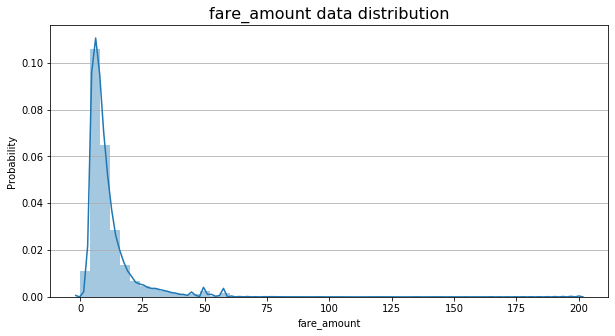

In [263]:
# Checking data distribution for fare_data feature

fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(df1.fare_amount, ax = ax)
ax.set_title('fare_amount data distribution', size = 16)
ax.set_ylabel('Probability')
ax.grid(axis='y')

#### Insights:
+ Most frequent average fare amount is 10 dollers.
+ We have some negative fare amount as well, need to explore those records further.
+ The data distribution is right skewed.

In [234]:
# Exploring the negative fare amount

negative_fare = df1.loc[df1.fare_amount <= 0 ]
negative_fare

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
2039,-2.9,-73.789450,40.643498,-73.788665,40.641952,1,2010-03-09,23:37:10
2486,-2.5,-74.000031,40.720631,-73.999809,40.720539,1,2015-03-22,05:14:27
10002,0.0,-73.987115,40.738808,-74.005911,40.713960,1,2010-02-15,14:26:01
13032,-3.0,-73.995062,40.740755,-73.995885,40.741357,4,2013-08-30,08:57:10
27891,0.0,-74.077927,40.805714,-74.077919,40.805721,1,2015-05-15,21:40:28
28839,-2.5,-73.785260,40.648442,0.000000,0.000000,1,2013-08-11,13:39:10
36722,-2.5,-73.952187,40.790112,-73.950043,40.792839,1,2015-04-30,15:19:45
42337,-5.0,-73.990974,40.755985,-73.980820,40.759869,1,2015-03-09,10:29:46
47302,0.0,-73.942346,40.806269,-73.942463,40.806129,1,2010-03-18,19:13:39


#### Insights:
+ For each booking taxi will charge minimum amount but it will not be zero doller or negative price.
+ So we can consider these records as outlier and delete from the dataset.

In [235]:
# Deleting the records from dataset where fare_amount is zero or less then zero

df1.drop( df1[ df1.fare_amount <= 0 ].index, inplace = True )
df1.shape

(49991, 8)

#### Abservation:
+ 9 record's fare_amount is zero or less then zero, so we have deleted those line items.
+ Orginal dataset had 50000 records but after deletion we have 49991 records

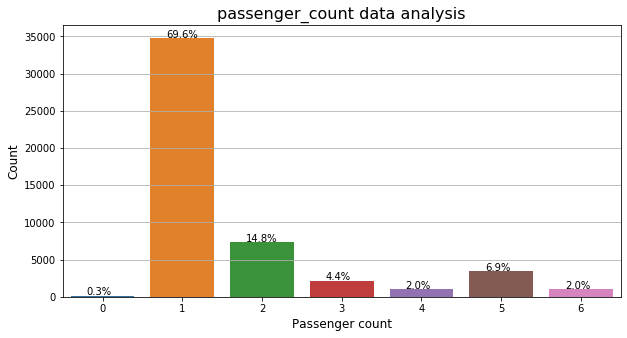

In [289]:
# Checking data distribution for passenger_count data

fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(df1.passenger_count, ax = ax)
ax.set_title('passenger_count data analysis', size = 16)
ax.set_xlabel('Passenger count', size = 12)
ax.set_ylabel('Count', size = 12)
ax.grid(axis='y')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format( (p.get_height() / df1.shape[0]) * 100 ), (p.get_x()+0.2, p.get_height()+55))
plt.show()

#### Insights:
+ Around 70% of booking is done for single passenger
+ We have a booking records zero passenger count as well. Which is actually looks like abnormal, so we have to explore further.
+ Passenger count five and six might have booked large seat capacity, so it is obvious to have high fare.

In [237]:
# Exploring the zero passenger observations, filtered by Pandas query

len(df1.query("passenger_count == 0"))

165

#### Assemption:
+ We have 165 records with zero passenger count.
+ These kind of case is sometimes possbile, because we can book the cab to deliver goods item. So we can treat them as valid one

In [247]:
# Creating new dataframe with seperate Day, Month, Year and Time columns

#--> First changing the data type of date & time into datetime format
df1['date'] = pd.to_datetime(df1['date'])
df1['time'] = pd.to_datetime(df1['time'], format = '%H:%M:%S')

#--> Creating new dataframe
data = { 'day'  : df1['date'].dt.day, 
         'month': df1['date'].dt.month,
         'year' : df1['date'].dt.year,
         'hour' : df1['time'].dt.hour,
         'min'  : df1['time'].dt.minute,
         'sec'  : df1['time'].dt.second,
       }

time_stamp = pd.DataFrame(data)
time_stamp.head()

,day,month,year,hour,min,sec
0,15,6,2009,17,26,21
1,5,1,2010,16,52,16
2,18,8,2011,0,35,0
3,21,4,2012,4,30,42
4,9,3,2010,7,51,0


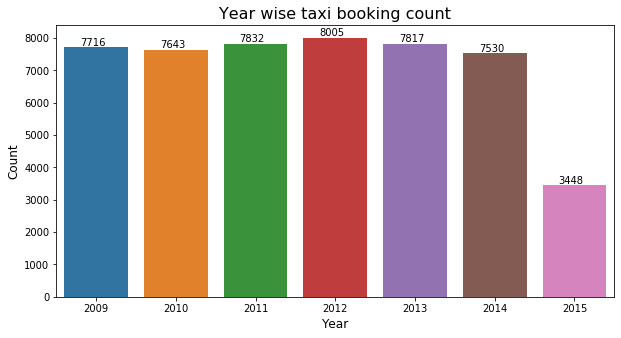

In [287]:
# Year wise taxi booking count

fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(time_stamp.year, ax = ax)
ax.set_title('Year wise taxi booking count', size = 16)
ax.set_xlabel('Year', size = 12)
ax.set_ylabel('Count', size = 12)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()) , (p.get_x()+0.2, p.get_height()+55))
plt.show()

#### Insights:
+ Till 2012 the taxi booking rate per year is linearly increasing except 2010 year.
+ Suddenly the taxi booking rate is decrease in 2013 & 2014 years.
+ Surprisingly in 2015 the rate of booking is reduced half the rate. 
+ This is because of dataset generated middle of 2015 or actul number of booking itself half the rate compare to previous year